## Planning Stage - Stallon Pinto (88077979)

In [26]:
### run this cell before starting

library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(reshape2)
library(AER)

In [27]:
### Run this cell before starting

data_description <- data.frame(
  Variable = c("University.Rank", "Name.of.University", "Location", "No.of.student", 
               "No.of.student.per.staff", "International.Student", "Female.Male.Ratio", 
               "OverAll.Score", "Teaching.Score", "Research.Score", "Citations.Score", 
               "Industry.Income.Score", "International.Outlook.Score"),
  Description = c("World Ranking of the University", "Name of the University", "Country that the University is in", 
                  "Number of Students Enrolled", "Number of Students Enrolled per Staff Member", "Number of International Students", 
                  "No. of Females to No. of Males Ratio", "Overall University Score out of 100", "University Teaching Score out of 100", "University Research Score out of 100", 
                  "Number of Citations Received by a Journal in one year to documents published in the last three years, divided by the number of documents", "Money Recieved by University for Academic Expertise (out of 100)", "University's ability to atttract students and faculty from all over the world (out of 100)"),
  DataType = c("Character", "Character", "Character", "Character$", "Double", "Character", 
               "Character", "Character", "Character$", "Character$", "Character$", "Character$", "Character$"),
  stringsAsFactors = FALSE
)

### 1. Data Description

**Brief Description:**

The dataset contains information on the world university rankings for the year 2023 obtained from The World University Rankings 2023 dataset, one of the largest and most comprehensive university rankings to date. It includes 13 carefully picked indicators that evaluate universities over four areas: teaching, research, international outlook, & knowledge transfer. The rankings analyzed over 121 million citations across more than 15.5 million research publications and included survey responses from 40,000 scholars globally. Overall, the rankings have drawn information from around 680,000 datapoints over more than 2,500 institutions that submitted data.

**Dataset Summary:**

• Number of Observations: 2341  
• Number of Variables: 13

This dataset includes the following 13 metrics:

In [28]:
data_description

Variable,Description,DataType
<chr>,<chr>,<chr>
University.Rank,World Ranking of the University,Character
Name.of.University,Name of the University,Character
Location,Country that the University is in,Character
No.of.student,Number of Students Enrolled,Character$
No.of.student.per.staff,Number of Students Enrolled per Staff Member,Double
International.Student,Number of International Students,Character
Female.Male.Ratio,No. of Females to No. of Males Ratio,Character
OverAll.Score,Overall University Score out of 100,Character
Teaching.Score,University Teaching Score out of 100,Character$


**Notes**  

1. Some variables are of char data type and will be converted to double data type during data cleaning.
2. Some variables have missing values, particularly in the university name, location, and several scores. These will also be dealt with during EDA.
3. The dataset also includes categorical data, which might require preprocessing before analysis.


### 2. The Question of Interest

**Research Question:** Can we predict the International Outlook Score of a university based on the number of students, number of international students, student to professor ratio, overall score, overall ranking, and research score?  
**Response Variable:** International Outlook Score  
**Explanatory Variables:** Location, No. of Students, No. of Students per staff, International Students, Overall Score, Teaching Score, Research Score



This question focuses on the `prediction` of the international outlook score.  We aim to develop a predictive linear regression model that can estimate the International Outlook Score of a university using the aforementioned explanatory variables. Additionally, by examining the coefficients and significance of the predictors, we can also draw `inference` about the factors that most strongly influence the international outlook of a university since identifying factors that enhance a university’s international outlook can help institutions improve their global engagement and reputation.


The World University Rankings 2023 dataset contains comprehensive information about universities, including various performance metrics and demographic data. By leveraging these variables, we can build a regression model to predict the International Outlook Score.

### 3. Exploratory Data Analysis & Visualization

#### Reading the Data

We’ll begin by loading the dataset into R.

In [29]:
uni_data <- read.csv("unirank.csv")

head(uni_data)

,University.Rank,Name.of.University,Location,No.of.student,No.of.student.per.staff,International.Student,Female.Male.Ratio,OverAll.Score,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
4,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


#### Data Cleaning

To make some of these numerical columns useful, we will have to change their data type from char to dbl. Before using the `as.numeric()` function, however, note that `No.of.student` contains commas that need to be removed, `International.Student` has the % symbol which needs to be removed.

In [30]:
uni_data <- uni_data %>%
  mutate(
    `No.of.student` = as.numeric(gsub(",", "", `No.of.student`)),
    `No.of.student.per.staff` = as.numeric(`No.of.student.per.staff`),
    `International.Student` = as.numeric(gsub("%", "", `International.Student`)),
    `OverAll.Score` = as.numeric(`OverAll.Score`),
    `Teaching.Score` = as.numeric(`Teaching.Score`),
    `Research.Score` = as.numeric(`Research.Score`),
    `Citations.Score` = as.numeric(`Citations.Score`),
    `Industry.Income.Score` = as.numeric(`Industry.Income.Score`),
    `International.Outlook.Score` = as.numeric(`International.Outlook.Score`)
  )

head(uni_data)

Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `OverAll.Score = as.numeric(OverAll.Score)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”


,University.Rank,Name.of.University,Location,No.of.student,No.of.student.per.staff,International.Student,Female.Male.Ratio,OverAll.Score,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,University of Oxford,United Kingdom,20965,10.6,42,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,2,Harvard University,United States,21887,9.6,25,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,3,University of Cambridge,United Kingdom,20185,11.3,39,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
4,3,Stanford University,United States,16164,7.1,24,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,5,Massachusetts Institute of Technology,United States,11415,8.2,33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,6,California Institute of Technology,United States,2237,6.2,34,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


In [31]:
summary(uni_data)

 University.Rank    Name.of.University   Location         No.of.student   
 Length:2341        Length:2341        Length:2341        Min.   :   115  
 Class :character   Class :character   Class :character   1st Qu.:  6880  
 Mode  :character   Mode  :character   Mode  :character   Median : 14292  
                                                          Mean   : 19617  
                                                          3rd Qu.: 25884  
                                                          Max.   :460632  
                                                          NA's   :132     
 No.of.student.per.staff International.Student Female.Male.Ratio 
 Min.   :  0.4           Min.   :  0.00        Length:2341       
 1st Qu.: 12.6           1st Qu.:  1.00        Class :character  
 Median : 16.6           Median :  5.00        Mode  :character  
 Mean   : 19.0           Mean   : 10.13                          
 3rd Qu.: 22.2           3rd Qu.: 14.00                          
 Max

Now that the data has been cleaned and wrangled lets move onto some visualization proposals.  

To explore the dataset and address the question of predicting the International Outlook Score using the specified explanatory variables, I propose the use of a **Correlation Heatmap**. This will provide a visual representation of the correlations between all explanatory variables and the response variable, helping to identify which explanatory variables are most strongly correlated with International Outlook Score and with each other. This will also allow us to note any collinearity between different variables and allow us to accomodate for interaction.

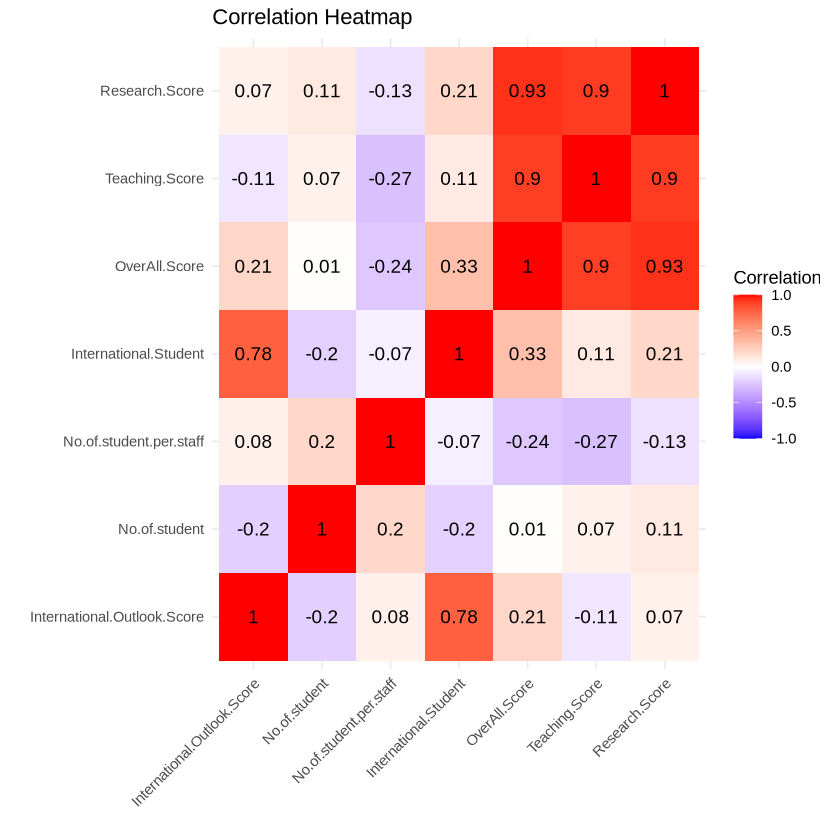

In [33]:
numeric_data <- uni_data %>%
  select(`International.Outlook.Score`, `No.of.student`, `No.of.student.per.staff`, `International.Student`, `OverAll.Score`, `Teaching.Score`, `Research.Score`)

cor_matrix <- cor(numeric_data, use = "complete.obs")
cor_melt <- melt(cor_matrix)

ggplot(cor_melt, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +  # Add this line to include correlation values
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation") +
  theme_minimal() +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


To predict and improve a university’s International Outlook Score, the strongest predictor is the number of international students, indicating that attracting and enrolling more international students is crucial. Additionally, maintaining a favorable student-to-staff ratio also has a moderate positive impact. While the overall score of the university moderately correlates with the International Outlook Score, focusing primarily on increasing international student numbers and managing student-to-staff ratios will be more effective strategies for enhancing the international outlook. Teaching and research scores have weaker correlations, suggesting that improvements in these areas alone are less impactful for this specific metric.

### 4. Method & Plan

1. **Why is this method appropriate?**  
•	Multiple Linear Regression is suitable for modeling the relationship between a continuous variable (International Outlook Score) and multiple continuous variiables variables.  
•	It helps quantify the impact of each explanatory variable on the dependent variable, providing a clear understanding of which factors contribute most significantly to the international outlook of universities. We can do additional coefficient hypothesis testing, transformations and other techniques to fit the model well.

2. **Assumptions Required:**  
•	Linearity: The relationship between the dependent and independent variables is linear.  
•	Independence: Observations are independent of each other.  
•	Homoscedasticity: The variance of errors is constant across all levels of the independent variables.  
•	Normality: The residuals (errors) of the model are normally distributed.  
•	No Multicollinearity: Independent variables should not be highly correlated with each other.  

3. **Potential Limitations or Weaknesses:**  
•	Multicollinearity: High correlation among explanatory variables can make it difficult to isolate the effect of each variable.  
•	Assumption Violations: If the assumptions of linear regression are not met, the model’s validity and reliability may be compromised.  
•	Overfitting: Including too many variables can lead to overfitting, where the model performs well on training data but poorly on new, unseen data.  
•	Bias from Unobserved Variables: There may be relevant factors affecting the International Outlook Score that are not included in the model, leading to biased estimates.  

Using Multiple Linear Regression, we can identify and quantify the key factors influencing the International Outlook Score, providing valuable insights for university administrators and policymakers aiming to improve their institution’s international reputation.